# Image Classification using Keras and TF -   

In [1]:
import numpy as np 
import pandas as pd 

%matplotlib inline 
import matplotlib as mtp 
import matplotlib.pyplot as plt 

In [2]:
import tensorflow as tf     # pip install tensorflow==<version_name> 
from tensorflow import keras 

In [3]:
tf.__version__

'2.19.0'

In [4]:
keras.__version__ 

'3.10.0'

In [5]:
np.random.seed(42) 
tf.random.set_seed(42) 

# Image dataset loading (available in keras)  

In [6]:
fashion_mnist = keras.datasets.fashion_mnist 
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data() 

In [7]:
print(f"Train size :\n{x_train_full.shape}\n{y_train_full.shape}\nTest size : \n{x_test.shape}\n{y_test.shape}") 

Train size :
(60000, 28, 28)
(60000,)
Test size : 
(10000, 28, 28)
(10000,)


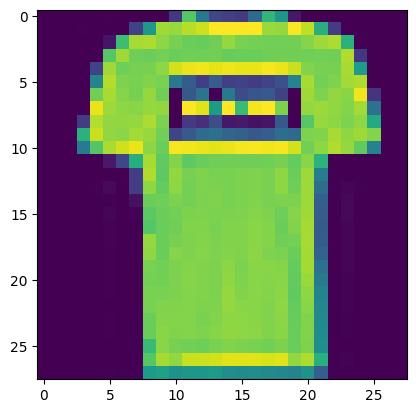

In [8]:
plt.imshow(x_train_full[1])    # sample image out of 60k images 

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] 

In [10]:
class_names[y_train_full[1]] 

'T-shirt/top'

Data Normalization (we normalize the data so that it is approximately the same scale)  

In [11]:
x_train_n = x_train_full / 255.0      # 255 is the final limit in pixel colors 
x_test_n = x_test / 255.0 

Data splitting as train, validation, and test sets  

In [12]:
X_valid, X_train = x_train_n[:5000], x_train_n[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] 
X_test = x_test_n 

In [13]:
X_valid 

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [14]:
y_valid 

array([9, 0, 0, ..., 5, 8, 3], dtype=uint8)

# Neural Network Model (in Keras)  

In [15]:
# Sequential model object 
model = keras.models.Sequential([
    keras.layers.Input(shape=(28,28)),   # Input layer; making the 2D array to a 1D format for input layer 
    keras.layers.Flatten(), 
    keras.layers.Dense(300, activation='relu'),  # Hidden layer 1; with 300 neurons and ReLU activation function  _| 0 for -ve values & |
    keras.layers.Dense(100, activation='relu'),  # Hidden layer 2; with 100 neurons and ReLU activation function   | 1 for +ve values.  |
    keras.layers.Dense(10, activation='softmax')  
    # Output layer; with 10 neurons and softmax activation function for exclusive class classification
])       

##  OR --
# model = keras.models.Sequential() 
# model.add(keras.layers.Flatten(input_shape=[28, 28]))     # Input layer; making the 2D array to a 1D format for input layer 
# model.add(keras.layers.Dense(300, activation='relu'))     # Hidden layer 1; with 300 neurons and ReLU activation function  _| 0 for -ve values & |
# model.add(keras.layers.Dense(100, activation='relu'))     # Hidden layer 2; with 100 neurons and ReLU activation function   | 1 for +ve values.  |
# model.add(keras.layers.Dense(10, activation='softmax'))   # Output layer; with 10 neurons and softmax activation function for exclusive class classification 


model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

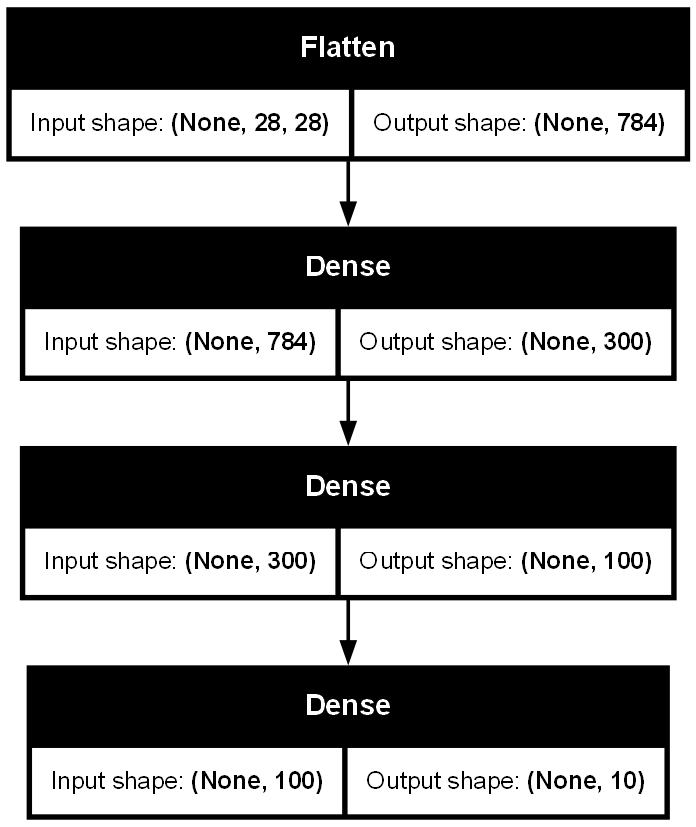

In [16]:
import pydot 
from IPython.display import Image  

# keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')  

keras.utils.plot_model(model, show_shapes=True, to_file='model.png', dpi=130)   
Image('model.png')  

In [17]:
weight_l1, bais_l1 = model.layers[1].get_weights()   # Weight and bias distribution at different dense layers 
weight_l2, bais_l2 = model.layers[2].get_weights()   # Weight and bias distribution at different dense layers 
weight_l3, bais_l3 = model.layers[3].get_weights()   # Weight and bias distribution at different dense layers 

In [18]:
weight_l1 

array([[ 0.02757338,  0.00046888, -0.02405347, ...,  0.00362547,
         0.01282328, -0.04312159],
       [ 0.00819987, -0.04895752,  0.03156532, ...,  0.03188663,
         0.06109127,  0.01009213],
       [ 0.03904986,  0.00119776,  0.02184042, ...,  0.03354762,
         0.03486793,  0.01796915],
       ...,
       [ 0.07237339, -0.05194858, -0.01489213, ...,  0.03413959,
         0.00319682,  0.04805353],
       [ 0.07097012,  0.00752965, -0.03209954, ...,  0.03445014,
        -0.00712223,  0.06686206],
       [-0.01557822, -0.06543892, -0.00183523, ..., -0.00028418,
         0.02790258,  0.07373835]], dtype=float32)

In [19]:
bais_l1 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
print(f"Weight shape : {weight_l1.shape}\nBias shape : {bais_l1.shape}") 

Weight shape : (784, 300)
Bias shape : (300,)


In [21]:
weight_l2 

array([[ 0.04290571,  0.07476146, -0.0904697 , ...,  0.10093365,
        -0.06112389, -0.00964926],
       [-0.10169788, -0.02830783,  0.10017108, ...,  0.06514671,
        -0.03276647, -0.06970022],
       [ 0.12033451, -0.00052362,  0.03395676, ...,  0.10365395,
        -0.00908342, -0.03218124],
       ...,
       [ 0.11484533,  0.0154422 , -0.01628679, ...,  0.02251662,
        -0.08447251, -0.10526801],
       [ 0.08352741, -0.07184748,  0.12081852, ..., -0.09604484,
         0.0009667 ,  0.12077693],
       [ 0.10722766, -0.06886976, -0.02916133, ...,  0.04111829,
         0.10205146, -0.06331843]], dtype=float32)

In [22]:
bais_l2 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [23]:
print(f"Weight shape : {weight_l2.shape}\nBias shape : {bais_l2.shape}") 

Weight shape : (300, 100)
Bias shape : (100,)


In [24]:
weight_l3 

array([[ 1.05403394e-01, -6.02542311e-02,  6.38259947e-02,
        -6.59659952e-02, -2.95737386e-02,  1.24512225e-01,
         2.41617858e-03, -3.22442800e-02,  1.06876552e-01,
        -1.25056505e-01],
       [-2.20956400e-01,  7.36696720e-02, -1.88459218e-01,
        -1.75364614e-01, -1.22811332e-01, -9.50775146e-02,
        -5.74477762e-02,  2.50695944e-02,  7.73957968e-02,
         3.00769508e-03],
       [ 1.22013569e-01,  1.98184162e-01, -4.88935411e-02,
        -2.17404634e-01, -1.97475493e-01, -1.60772830e-01,
        -1.01468369e-01, -3.09292227e-02,  1.85285479e-01,
        -1.59624547e-01],
       [-7.59047717e-02, -1.65105939e-01,  2.02100784e-01,
         3.68215442e-02,  1.62298918e-01, -7.52393901e-03,
        -1.00923851e-01,  9.79255140e-02,  9.35350955e-02,
         2.27760643e-01],
       [-7.75499642e-02, -1.78648993e-01,  8.82965922e-02,
         1.74445570e-01, -4.66412306e-02, -7.36221224e-02,
         2.13244915e-01,  1.73280239e-01,  2.03175843e-02,
        -1.

In [25]:
bais_l3 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [26]:
print(f"Weight shape : {weight_l3.shape}\nBias shape : {bais_l3.shape}") 

Weight shape : (100, 10)
Bias shape : (10,)


# Model compilation and showcase -  

In [27]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])    # sgd: Stoichastic Gradient Descent 

In [28]:
model_history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)) 
print(f"Model parameters : {model_history.params}") 
print(f"Model history : {model_history.history}") 

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6768 - loss: 0.9856 - val_accuracy: 0.8150 - val_loss: 0.5328
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8220 - loss: 0.5096 - val_accuracy: 0.8428 - val_loss: 0.4654
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8404 - loss: 0.4523 - val_accuracy: 0.8538 - val_loss: 0.4298
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8507 - loss: 0.4213 - val_accuracy: 0.8616 - val_loss: 0.4067
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8578 - loss: 0.3999 - val_accuracy: 0.8678 - val_loss: 0.3909
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8635 - loss: 0.3832 - val_accuracy: 0.8704 - val_loss: 0.3786
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8683 - loss: 0.3695 - val_accuracy: 0.8730 - val_loss: 0.3689
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8724 - loss: 0.3577 - 

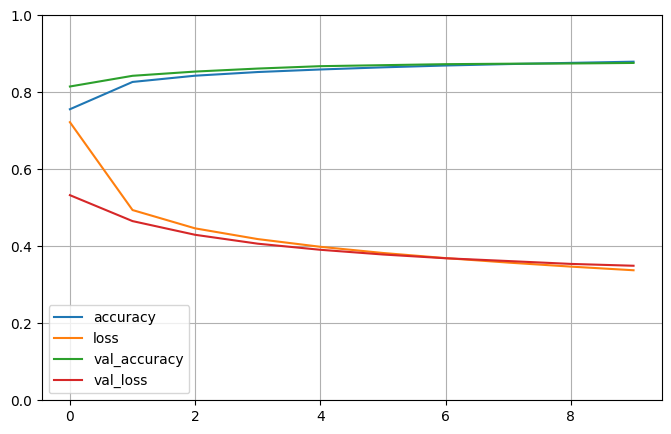

In [29]:
pd.DataFrame(model_history.history).plot(figsize=(8,5)) 
plt.grid(True) 
plt.gca().set_ylim(0, 1) 
plt.show() 